In [1]:
import os 
from glob import glob

import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data_paths = glob('./dataset/cifar/train/*.png')
data_paths

['./dataset/cifar/train/23927_frog.png',
 './dataset/cifar/train/3442_deer.png',
 './dataset/cifar/train/11364_cat.png',
 './dataset/cifar/train/17265_dog.png',
 './dataset/cifar/train/36801_bird.png',
 './dataset/cifar/train/8324_bird.png',
 './dataset/cifar/train/15345_cat.png',
 './dataset/cifar/train/18061_dog.png',
 './dataset/cifar/train/19872_cat.png',
 './dataset/cifar/train/32396_frog.png',
 './dataset/cifar/train/3000_cat.png',
 './dataset/cifar/train/16169_airplane.png',
 './dataset/cifar/train/39484_automobile.png',
 './dataset/cifar/train/33799_frog.png',
 './dataset/cifar/train/9345_cat.png',
 './dataset/cifar/train/18245_dog.png',
 './dataset/cifar/train/4060_airplane.png',
 './dataset/cifar/train/36808_frog.png',
 './dataset/cifar/train/42857_truck.png',
 './dataset/cifar/train/5713_cat.png',
 './dataset/cifar/train/23016_airplane.png',
 './dataset/cifar/train/22840_dog.png',
 './dataset/cifar/train/12245_truck.png',
 './dataset/cifar/train/14056_airplane.png',
 './data

In [4]:
path = data_paths[0]
path

'./dataset/cifar/train/23927_frog.png'

In [5]:
gfile = tf.io.read_file(path)
image = tf.io.decode_image(gfile)

In [6]:
image.shape

TensorShape([32, 32, 3])

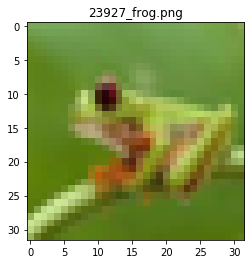

In [8]:
plt.title(os.path.basename(path))
plt.imshow(image)

# tf.data

In [9]:
data_paths[:10]

['./dataset/cifar/train/23927_frog.png',
 './dataset/cifar/train/3442_deer.png',
 './dataset/cifar/train/11364_cat.png',
 './dataset/cifar/train/17265_dog.png',
 './dataset/cifar/train/36801_bird.png',
 './dataset/cifar/train/8324_bird.png',
 './dataset/cifar/train/15345_cat.png',
 './dataset/cifar/train/18061_dog.png',
 './dataset/cifar/train/19872_cat.png',
 './dataset/cifar/train/32396_frog.png']

In [10]:
def read_image(path):
    gfile = tf.io.read_file(path)
    image = tf.io.decode_image(gfile)
    return image

In [12]:
dataset = tf.data.Dataset.from_tensor_slices(data_paths)
dataset

<TensorSliceDataset shapes: (), types: tf.string>

In [13]:
dataset = dataset.map(read_image)

In [14]:
tf_image = next(iter(dataset))
tf_image.shape

TensorShape([32, 32, 3])

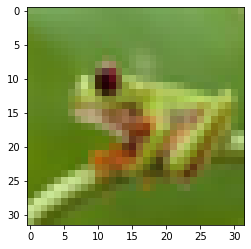

In [15]:
plt.imshow(tf_image)

## Batch로 묶기

In [16]:
batch_size = 32

In [17]:
dataset = tf.data.Dataset.from_tensor_slices(data_paths)
dataset = dataset.map(read_image)
dataset = dataset.batch(batch_size)

In [18]:
tf_image = next(iter(dataset))

In [19]:
tf_image.shape

TensorShape([32, 32, 32, 3])

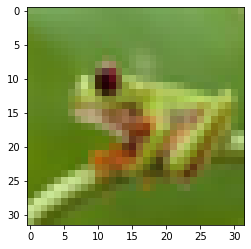

In [20]:
plt.imshow(tf_image[0])

## Shuffle 하기

In [21]:
dataset = tf.data.Dataset.from_tensor_slices(data_paths)
dataset = dataset.map(read_image)
dataset = dataset.batch(batch_size)
dataset = dataset.shuffle(buffer_size=len(data_paths))

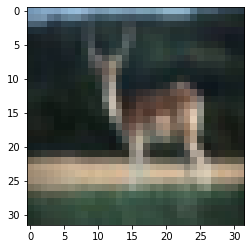

In [25]:
tf_image = next(iter(dataset))

plt.imshow(tf_image[0])

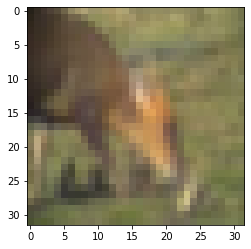

In [26]:
tf_image = next(iter(dataset))

plt.imshow(tf_image[0])

## Label하고 같이 넣기 

In [27]:
path

'./dataset/cifar/train/23927_frog.png'

In [30]:
class_name = path.split('_')[-1].replace('.png', '')
class_name

'frog'

In [31]:
def get_label(path):
    return path.split('_')[-1].replace('.png', '')

In [32]:
path, get_label(path)

('./dataset/cifar/train/23927_frog.png', 'frog')

In [33]:
label_names = [ get_label(path) for path in data_paths]
label_names[:10]

['frog', 'deer', 'cat', 'dog', 'bird', 'bird', 'cat', 'dog', 'cat', 'frog']

In [34]:
class_names = np.unique(label_names)
class_names

array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog',
       'horse', 'ship', 'truck'], dtype='<U10')

In [35]:
class_names == 'frog'

array([False, False, False, False, False, False,  True, False, False,
       False])

In [37]:
onehot_encoding = np.array(class_names=='frog', dtype=np.uint8)
onehot_encoding

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=uint8)

In [38]:
def onehot_encoding(label):
    return np.array(class_names == label, dtype=np.uint8)

In [39]:
data_paths[:10]

['./dataset/cifar/train/23927_frog.png',
 './dataset/cifar/train/3442_deer.png',
 './dataset/cifar/train/11364_cat.png',
 './dataset/cifar/train/17265_dog.png',
 './dataset/cifar/train/36801_bird.png',
 './dataset/cifar/train/8324_bird.png',
 './dataset/cifar/train/15345_cat.png',
 './dataset/cifar/train/18061_dog.png',
 './dataset/cifar/train/19872_cat.png',
 './dataset/cifar/train/32396_frog.png']

In [40]:
label_names[:10]

['frog', 'deer', 'cat', 'dog', 'bird', 'bird', 'cat', 'dog', 'cat', 'frog']

In [41]:
def read_image_label(path, label):
    gfile = tf.io.read_file(path)
    image = tf.io.decode_image(gfile)
    return image, label

In [42]:
dataset = tf.data.Dataset.from_tensor_slices((data_paths, label_names))
dataset = dataset.map(read_image_label)
dataset = dataset.batch(batch_size)
dataset = dataset.repeat()

In [43]:
image, label = next(iter(dataset))

In [44]:
image.shape, label.shape

(TensorShape([32, 32, 32, 3]), TensorShape([32]))

In [45]:
label[0]

<tf.Tensor: id=479, shape=(), dtype=string, numpy=b'frog'>

Text(0.5, 1.0, "b'frog'")

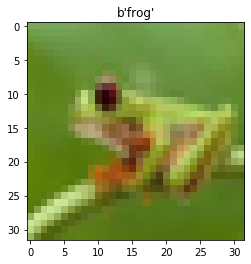

In [49]:
plt.imshow(image[0])
plt.title(label[0].numpy())

/home/chanseok/anaconda3/lib/python3.7/site-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Text(0.5, 1.0, '[0 0 0 0 1 0 0 0 0 0]')

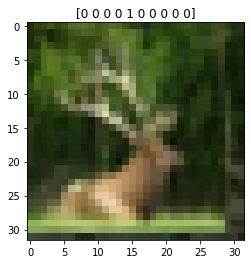

In [50]:
plt.imshow(image[1])
plt.title(onehot_encoding(label[1]))

## tensorflow 함수로 label 얻기

In [52]:
path

'./dataset/cifar/train/23927_frog.png'

In [54]:
onehot_encoding('frog')

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=uint8)

In [56]:
fname = tf.strings.split(path, '_')[-1]
fname

<tf.Tensor: id=726, shape=(), dtype=string, numpy=b'frog.png'>

In [57]:
cls_name = tf.strings.regex_replace(fname, '.png', '')
cls_name

<tf.Tensor: id=727, shape=(), dtype=string, numpy=b'frog'>

In [58]:
class_names

array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog',
       'horse', 'ship', 'truck'], dtype='<U10')

In [60]:
class_names == cls_name

<tf.Tensor: id=729, shape=(10,), dtype=bool, numpy=
array([False, False, False, False, False, False,  True, False, False,
       False])>

In [61]:
onehot = tf.cast(class_names == cls_name, tf.uint8)
onehot

<tf.Tensor: id=732, shape=(10,), dtype=uint8, numpy=array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=uint8)>

In [62]:
def get_label1(path):
    fname = tf.strings.split(path, '_')[-1]
    cls_name = tf.strings.regex_replace(fname, '.png', '')
    onehot = tf.cast(class_names == cls_name, tf.uint8)
    return onehot

In [65]:
def read_image_label(path):
    # read image
    gfile = tf.io.read_file(path)
    image = tf.io.decode_image(gfile)
    
    # get label
    label = get_label1(path)
    return image, label

In [66]:
dataset = tf.data.Dataset.from_tensor_slices(data_paths)
dataset = dataset.map(read_image_label)
dataset = dataset.batch(batch_size)
dataset = dataset.repeat()

In [67]:
image, label = next(iter(dataset))

In [68]:
image.shape, label.shape

(TensorShape([32, 32, 32, 3]), TensorShape([32, 10]))

In [69]:
label[0]

<tf.Tensor: id=994, shape=(10,), dtype=uint8, numpy=array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=uint8)>

/home/chanseok/anaconda3/lib/python3.7/site-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Text(0.5, 1.0, '[0 0 0 0 0 0 1 0 0 0]')

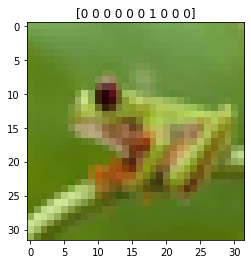

In [70]:
plt.imshow(image[0])
plt.title(label[0].numpy())